## Project proposal
### Importing the dataset

In [22]:
install.packages("cowplot")
install.packages("kknn")
install.packages("GGally")
install.packages('tidyverse')
library(kknn)
library(GGally)


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmp40wrHo/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmp40wrHo/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmp40wrHo/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmp40wrHo/downloaded_packages


In [23]:
#import libraries
install.packages("themis")
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 16)
library(readxl)
library(ggplot2)
library(cowplot)


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmp40wrHo/downloaded_packages


## Dataset background
- The dataset information can be found at: https://archive.ics.uci.edu/dataset/320/student+performance
## Questions for the dataset
- Mean final grade of students receiving extra support from school in comparison to students getting no support from school

## Import dataset

In [24]:
studenturl<- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
temp <- tempfile()
download.file(studenturl,temp)
studentzip <- unzip(temp, "student.zip")
studentfile <- unzip(studentzip,"student-por.csv")
student <- read_csv2(studentfile, col_names = TRUE)

student

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


## Clean and wrangle dataset
- For this dataset, we will select the variable of interest, along with filtering out any data that is invalid (i.e NA)
- After that we will filter out the freetime after school information to be 3 and above (indicating high to very high free time)

In [25]:
clean_student <- student %>%
                  select(schoolsup,G3)%>%
                  filter(!is.na(schoolsup),!is.na(G3))
clean_student
summary_student <- clean_student %>%
                   group_by(schoolsup)%>%
                   summarize(mean_final_grade = mean(G3))
summary_student

schoolsup,G3
<chr>,<dbl>
yes,11
no,11
yes,12
no,14
no,13
no,13
no,13
yes,13
⋮,⋮


schoolsup,mean_final_grade
<chr>,<dbl>
no,11.97935
yes,11.27941


## Plot the raw data
- We will plot the students freetime according to their address in a bargraph to see the proportion of students freetime in both category

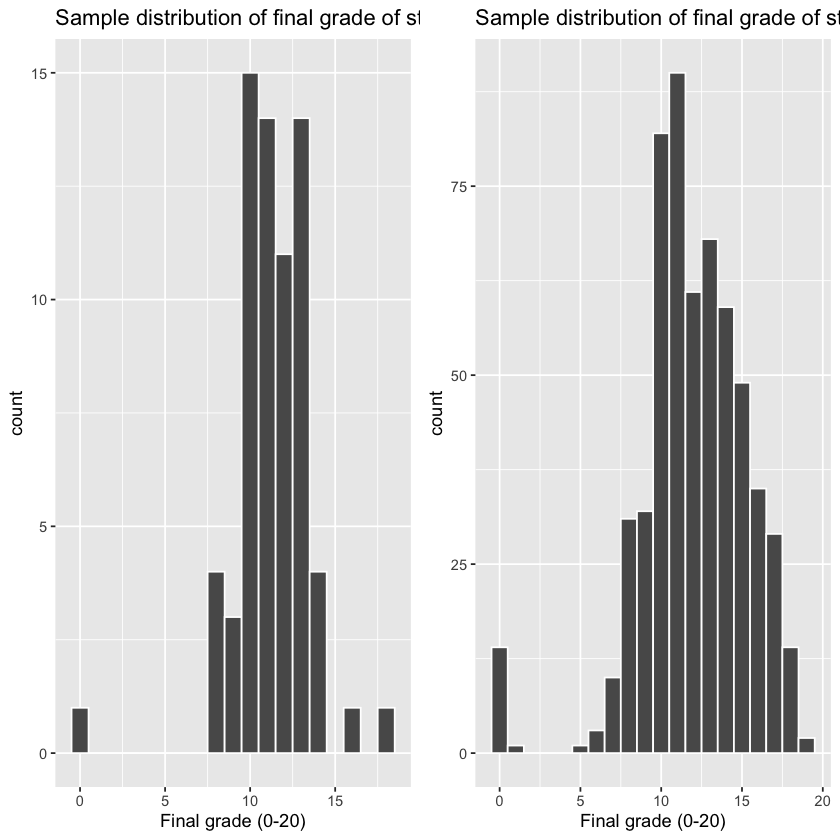

In [26]:
yes_grade_dist <- clean_student %>%
                  filter(schoolsup == "yes")%>%
                  ggplot()+
                  geom_histogram(aes(G3),binwidth=1,color="white")+
                  ggtitle("Sample distribution of final grade of students receiving extra support from school")+
                  xlab("Final grade (0-20)")

no_grade_dist <- clean_student %>%
                  filter(schoolsup == "no")%>%
                  ggplot()+
                  geom_histogram(aes(G3),binwidth=1,color="white")+
                  ggtitle("Sample distribution of final grade of students receiving extra support from school")+
                  xlab("Final grade (0-20)")
plot_grid(yes_grade_dist, no_grade_dist, ncol=2)